In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
from CorrectFeatures import correct_SCT_data, correct_SCT_labels
import matplotlib.pyplot as plt


In [30]:
training_data = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_training.csv"))
training_labels = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_training.csv"))

In [31]:
model_4_hours = RandomForestRegressor(n_estimators=100, n_jobs=8)
model_8_hours = RandomForestRegressor(n_estimators=100, n_jobs=8)
model_12_hours = RandomForestRegressor(n_estimators=100, n_jobs=8)
model_long_hours = RandomForestRegressor(n_estimators=100, n_jobs=8)


In [32]:
Y = training_labels

In [33]:
# Y = training_labels.drop(columns = ['attendance', 'number_over_4_hours',
#        'number_over_8_hours', 'percentage_within_8_hours',
#        'number_over_12_hours', 'percentage_within_12_hours',
#        'number_under_4_hours', 'number_4_hours_8_hours',
#        'number_8_hours_12_hours', 'percentage_within_4_hours'])

In [34]:
X = training_data

In [35]:
# X = training_data
# X["region_east"] = 1.0 *(X["region"] == "East")
# X["region_west"] =  1.0 *(X["region"] == "West")
# X["region_north"] =  1.0 *(X["region"] == "North")
# X = X.drop(columns=["region", "moon_phase_name"])
# for col in X.columns:
#     X[col] = X[col].astype(str).str.replace(',', '').astype(float)
#     if X[col].isna().any():
#         X[col] = X[col].fillna(0)

In [36]:
# X.columns[19]

In [37]:
model_4_hours.fit(X,Y.proportion_under_4_hours)
model_8_hours.fit(X,Y.proportion_4_hours_8_hours)
model_12_hours.fit(X,Y.proportion_8_hours_12_hours)
model_long_hours.fit(X,Y.proportion_over_12_hours)


RandomForestRegressor(n_jobs=8)

In [38]:
(mean_absolute_error(Y.proportion_under_4_hours, model_4_hours.predict(X)),
 mean_absolute_error(Y.proportion_4_hours_8_hours, model_8_hours.predict(X)),
 mean_absolute_error(Y.proportion_8_hours_12_hours, model_12_hours.predict(X)),
 mean_absolute_error(Y.proportion_over_12_hours, model_long_hours.predict(X)))

(0.010945202796985597,
 0.009347193075525702,
 0.0017938974409052058,
 0.0007031818811601619)

In [39]:
testing_data = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_testing.csv"))
testing_labels = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_testing.csv"))

In [40]:
X_test = testing_data
Y_test = testing_labels

In [41]:
# Y_test = testing_labels.drop(columns = ['attendance', 'number_over_4_hours',
#        'number_over_8_hours', 'percentage_within_8_hours',
#        'number_over_12_hours', 'percentage_within_12_hours',
#        'number_under_4_hours', 'number_4_hours_8_hours',
#        'number_8_hours_12_hours', 'percentage_within_4_hours'])
# X_test = testing_data
# X_test["region_east"] = 1.0 *(X_test["region"] == "East")
# X_test["region_west"] =  1.0 *(X_test["region"] == "West")
# X_test["region_north"] =  1.0 *(X_test["region"] == "North")
# X_test = X_test.drop(columns=["region", "moon_phase_name"])
# for col in X_test.columns:
#     X_test[col] = X_test[col].astype(str).str.replace(',', '').astype(float)
#     if X_test[col].isna().any():
#         X_test[col] = X_test[col].fillna(0)

In [42]:
(mean_absolute_error(Y_test.proportion_under_4_hours, model_4_hours.predict(X_test)),
 mean_absolute_error(Y_test.proportion_4_hours_8_hours, model_8_hours.predict(X_test)),
 mean_absolute_error(Y_test.proportion_8_hours_12_hours, model_12_hours.predict(X_test)),
 mean_absolute_error(Y_test.proportion_over_12_hours, model_long_hours.predict(X_test)))

(0.029878685162433943,
 0.02566703351837639,
 0.004970580434407427,
 0.001797393333101391)

In [43]:
def divide_by_sum(tuple_):
    sum_ = sum(tuple_)
    return [e/sum_ for e in tuple_]
normed_predictions = [list(l) for l in
                      zip(*map(divide_by_sum,
                               zip(model_4_hours.predict(X_test),
                                   model_8_hours.predict(X_test),
                                   model_12_hours.predict(X_test),
                                   model_long_hours.predict(X_test))))
                      ]
(mean_absolute_error(Y_test.proportion_under_4_hours, normed_predictions[0]),
 mean_absolute_error(Y_test.proportion_4_hours_8_hours, normed_predictions[1]),
 mean_absolute_error(Y_test.proportion_8_hours_12_hours, normed_predictions[2]),
 mean_absolute_error(Y_test.proportion_over_12_hours, normed_predictions[3]))

(0.02994263124064637,
 0.025629327805478316,
 0.004971650050643284,
 0.0017968594678954902)

In [44]:
model_bytes = pickle.dumps((model_4_hours,
                            model_8_hours,
                            model_12_hours,
                            model_long_hours))
print(len(model_bytes))
with open("Models/TrainingRandomForestScotlandModel.pkl", 'wb') as save_file:
    save_file.write(model_bytes)


172297643


In [45]:
model_4_hours_loaded,\
model_8_hours_loaded,\
model_12_hours_loaded,\
model_long_hours_loaded = None, None, None, None
with open("Models/TrainingRandomForestScotlandModel.pkl", 'rb') as save_file:
    model_bytes = save_file.read()
    print(len(model_bytes))
    model_4_hours_loaded,\
    model_8_hours_loaded,\
    model_12_hours_loaded,\
    model_long_hours_loaded = pickle.loads(model_bytes)

172297643


In [46]:
(mean_absolute_error(Y_test.proportion_under_4_hours, model_4_hours_loaded.predict(X_test)),
 mean_absolute_error(Y_test.proportion_4_hours_8_hours, model_8_hours_loaded.predict(X_test)),
 mean_absolute_error(Y_test.proportion_8_hours_12_hours, model_12_hours_loaded.predict(X_test)),
 mean_absolute_error(Y_test.proportion_over_12_hours, model_long_hours_loaded.predict(X_test)))

(0.029878685162433943,
 0.025667033518376393,
 0.004970580434407427,
 0.001797393333101391)

Text(0.5, 1.0, 'Feature Importance for Average Scottish Model')

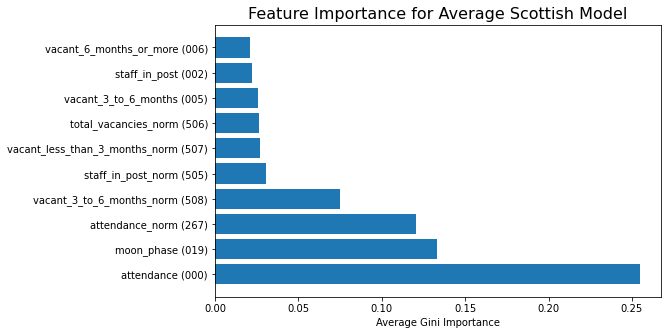

In [47]:
def format_names(names):
    return ["%s (%03d)"%(name, idx)for idx, name in enumerate(names)]
height, names= list(zip(*list(reversed(sorted(zip(
    (model_4_hours.feature_importances_ +
     model_8_hours.feature_importances_ +
     model_12_hours.feature_importances_ +
     model_long_hours.feature_importances_)/4,
    format_names(X.columns)
))))[:10]))
fig, axs = plt.subplots()
axs.barh(names, height)


axs.set_xlabel("Average Gini Importance")

fig.set_size_inches(8, 5)
axs.set_title("Feature Importance for Average Scottish Model", fontsize=16)

In [48]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_4_hours = permutation_importances(model_4_hours, X, Y.proportion_under_4_hours, r2)[:10]
perm_imp_8_hours = permutation_importances(model_8_hours, X, Y.proportion_4_hours_8_hours, r2)[:10]
perm_imp_12_hours = permutation_importances(model_12_hours, X, Y.proportion_8_hours_12_hours, r2)[:10]
perm_imp_long_hours = permutation_importances(model_long_hours, X, Y.proportion_over_12_hours, r2)[:10]



Text(0.5, 0.98, 'Feature Importance for Scottish models')

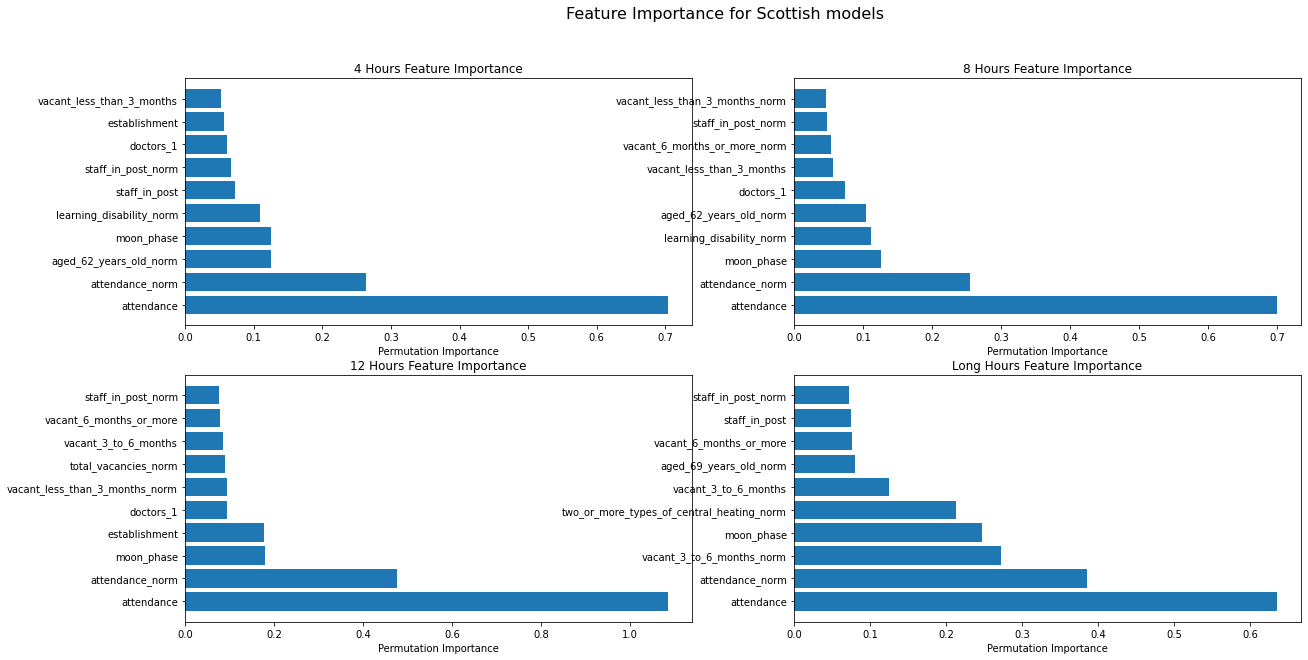

In [49]:
fig, axs = plt.subplots(2, 2)

axs[0,0].barh(perm_imp_4_hours.index, perm_imp_4_hours.Importance)
axs[0,0].set_title("4 Hours Feature Importance")

axs[0,1].barh(perm_imp_8_hours.index, perm_imp_8_hours.Importance)
axs[0,1].set_title("8 Hours Feature Importance")

axs[1,0].barh(perm_imp_12_hours.index, perm_imp_12_hours.Importance)
axs[1,0].set_title("12 Hours Feature Importance")

axs[1,1].barh(perm_imp_long_hours.index, perm_imp_long_hours.Importance)
axs[1,1].set_title("Long Hours Feature Importance")

for ax_r in axs:
    for ax in ax_r:
        ax.set_xlabel("Permutation Importance")

fig.set_size_inches(20, 10)
fig.suptitle("Feature Importance for Scottish models", fontsize=16)

C:\Users\wills\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


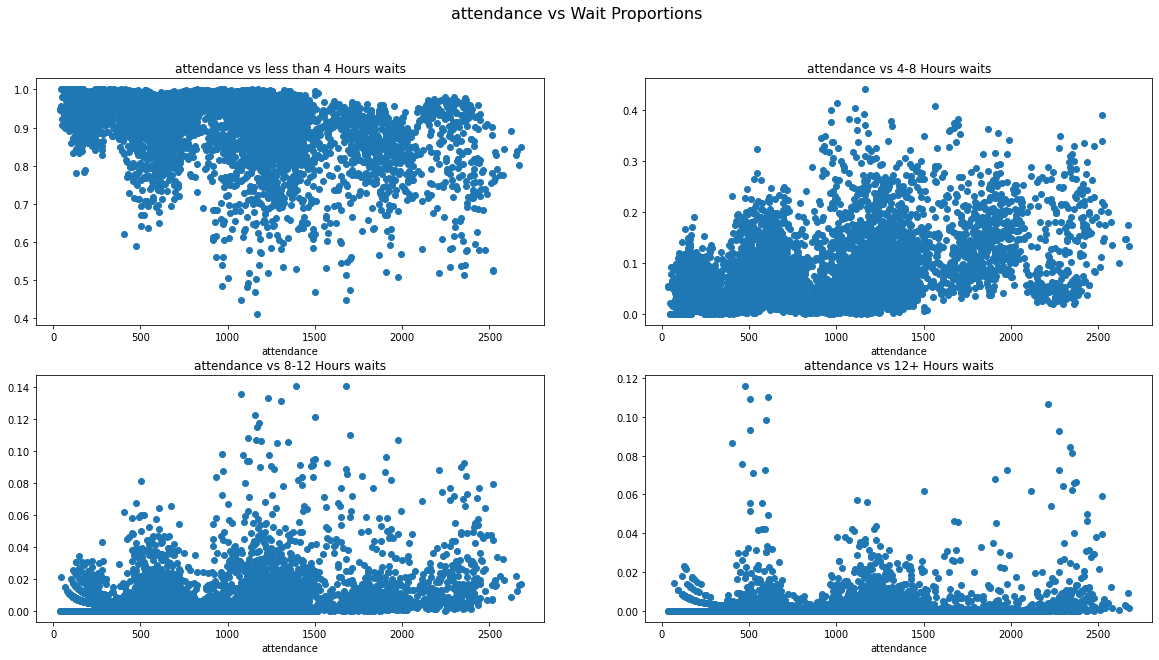

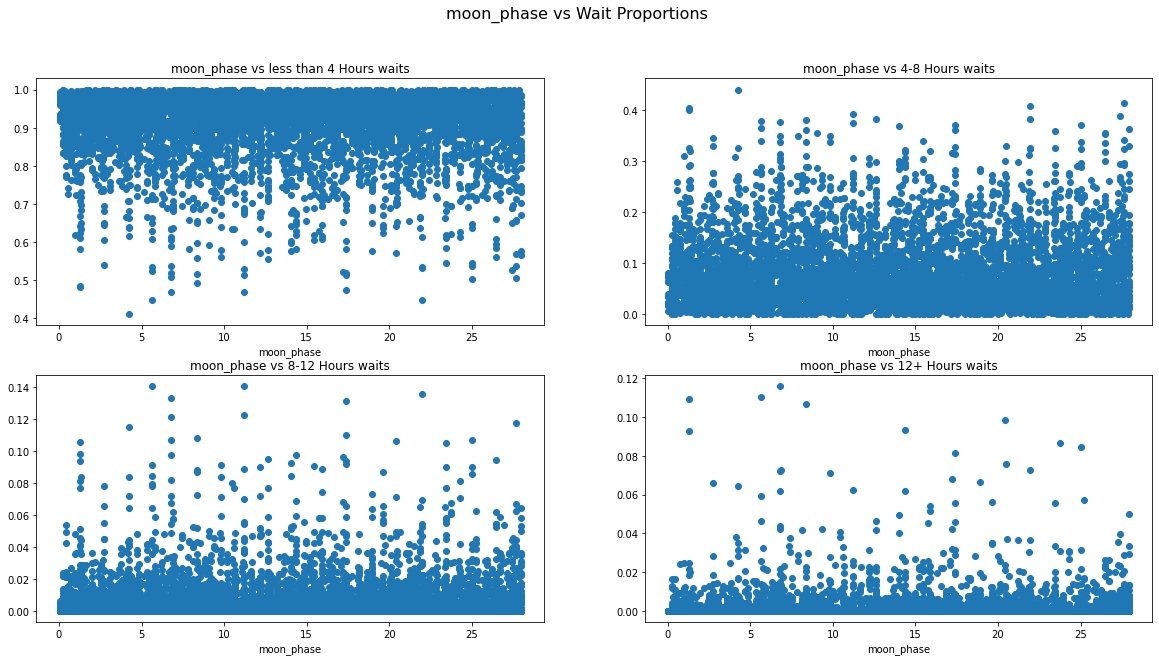

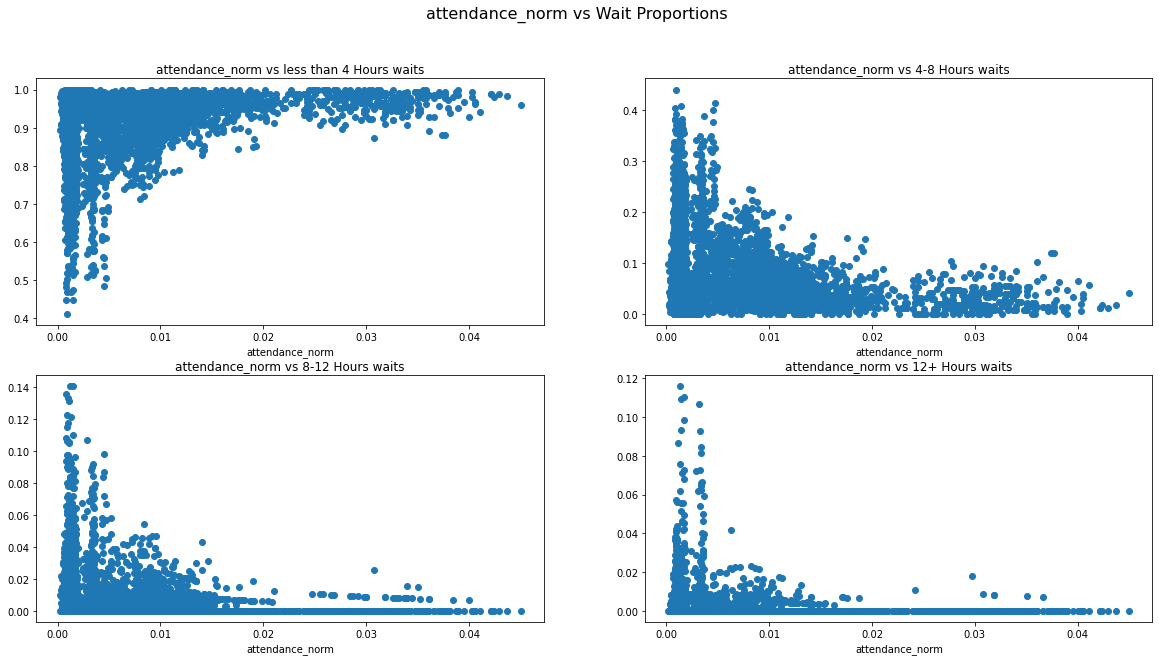

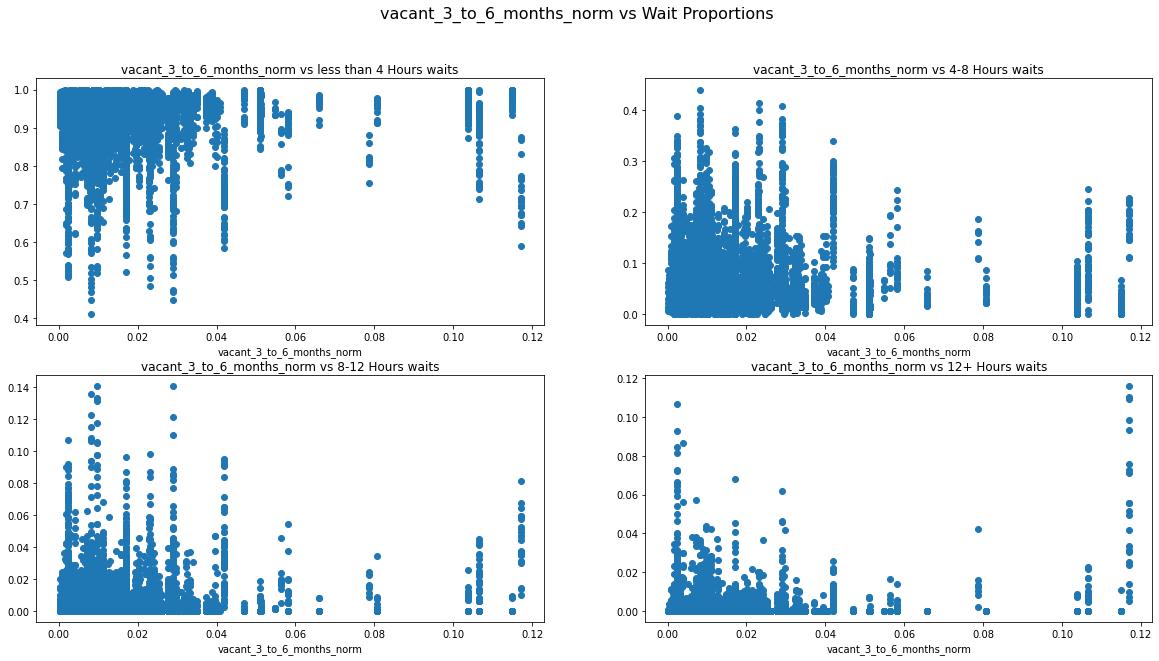

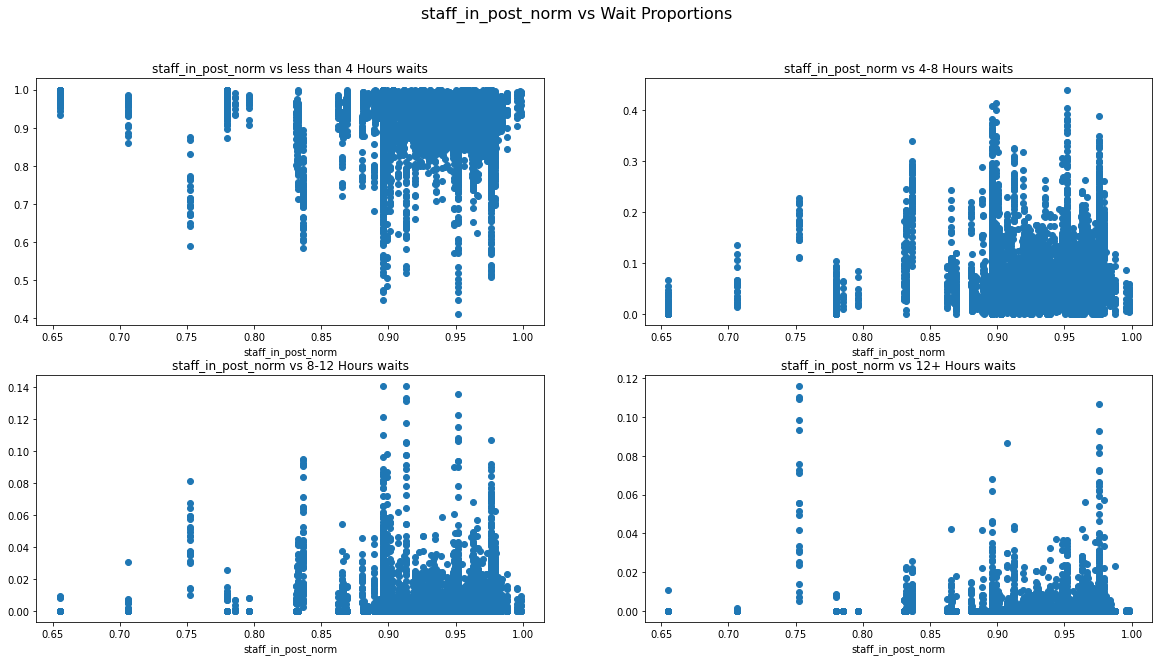

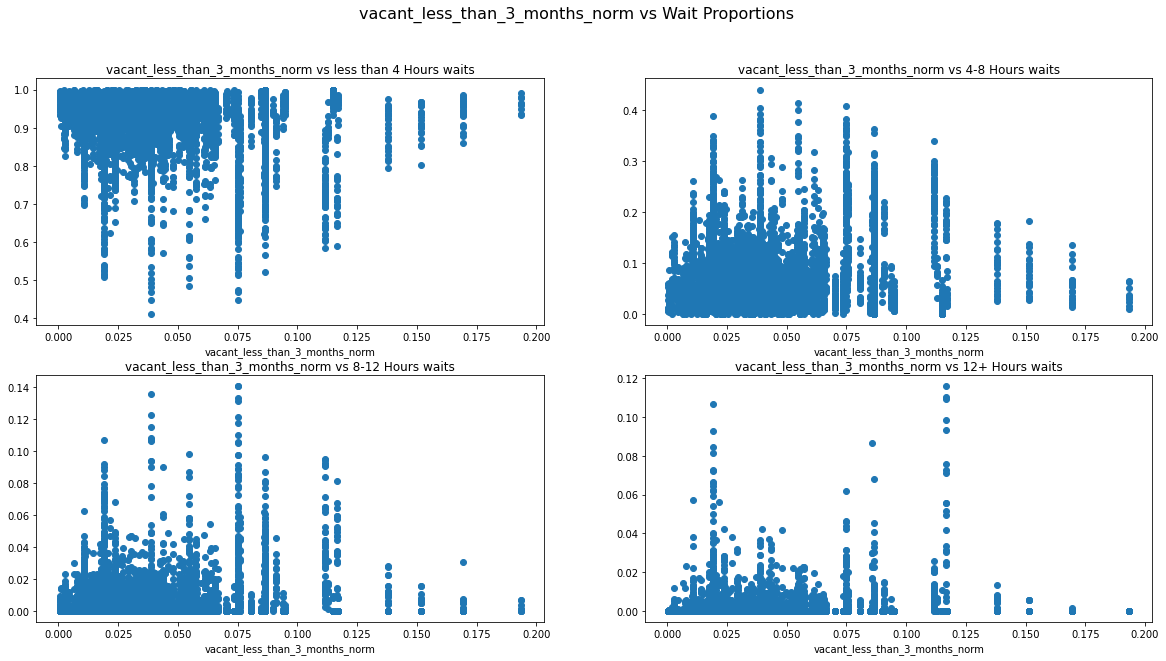

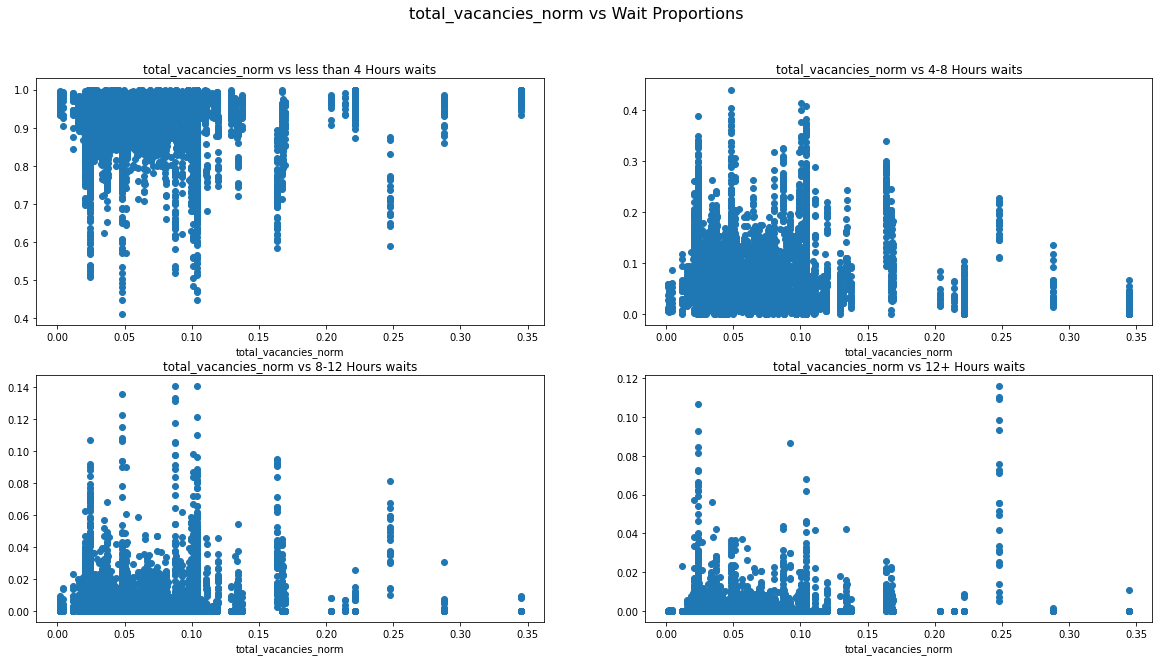

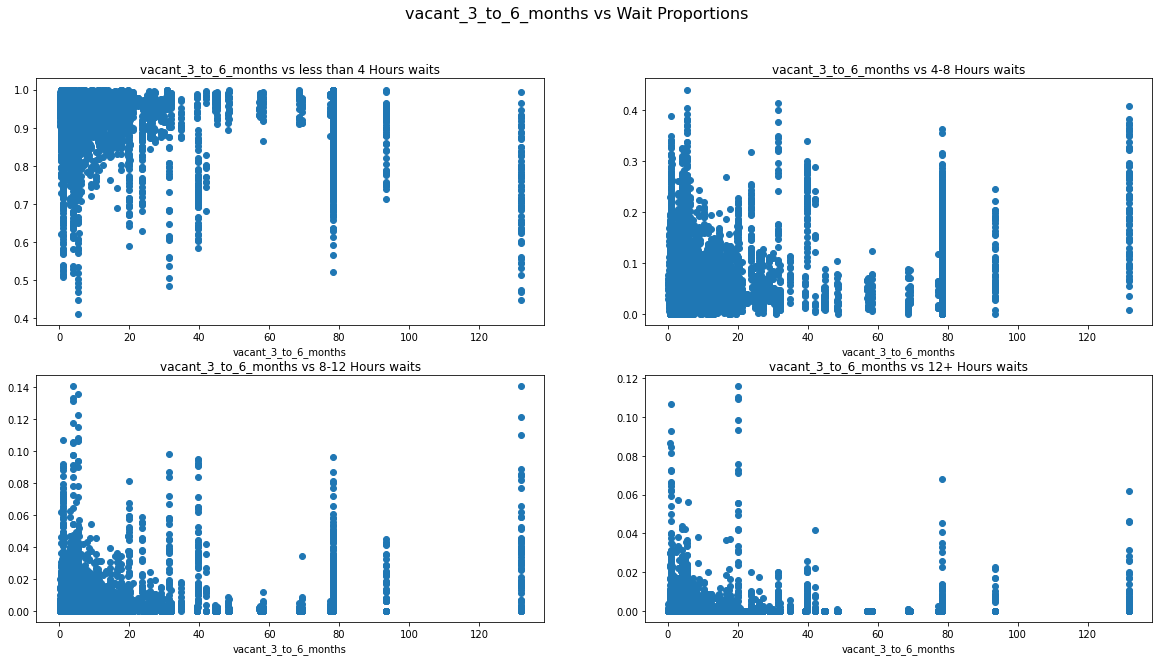

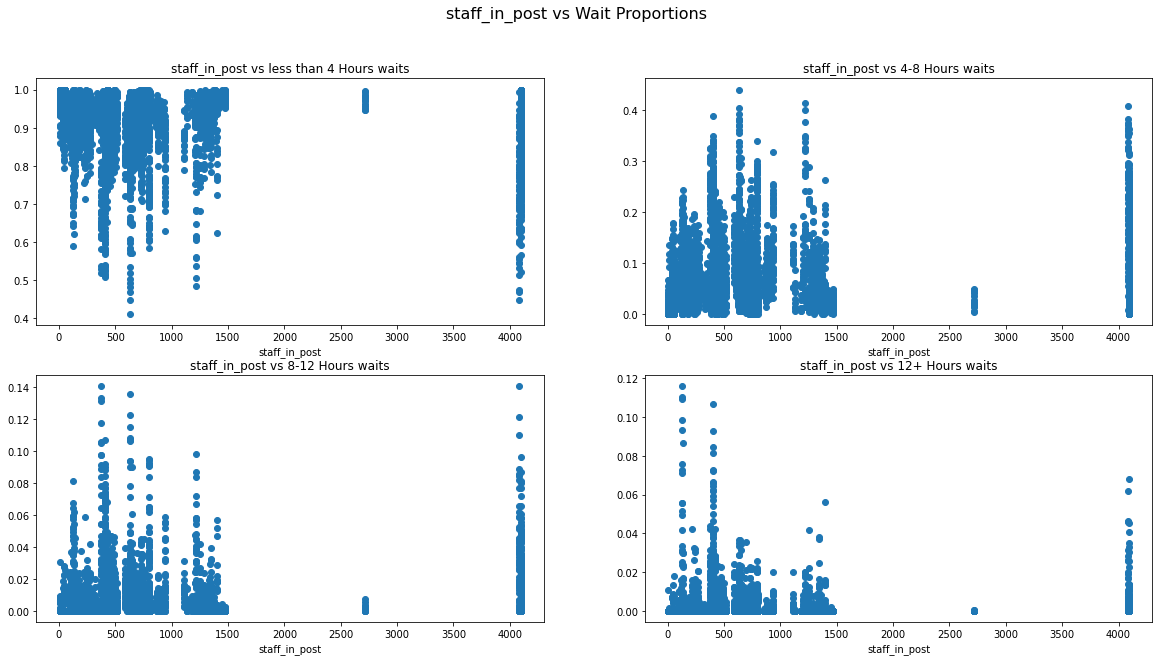

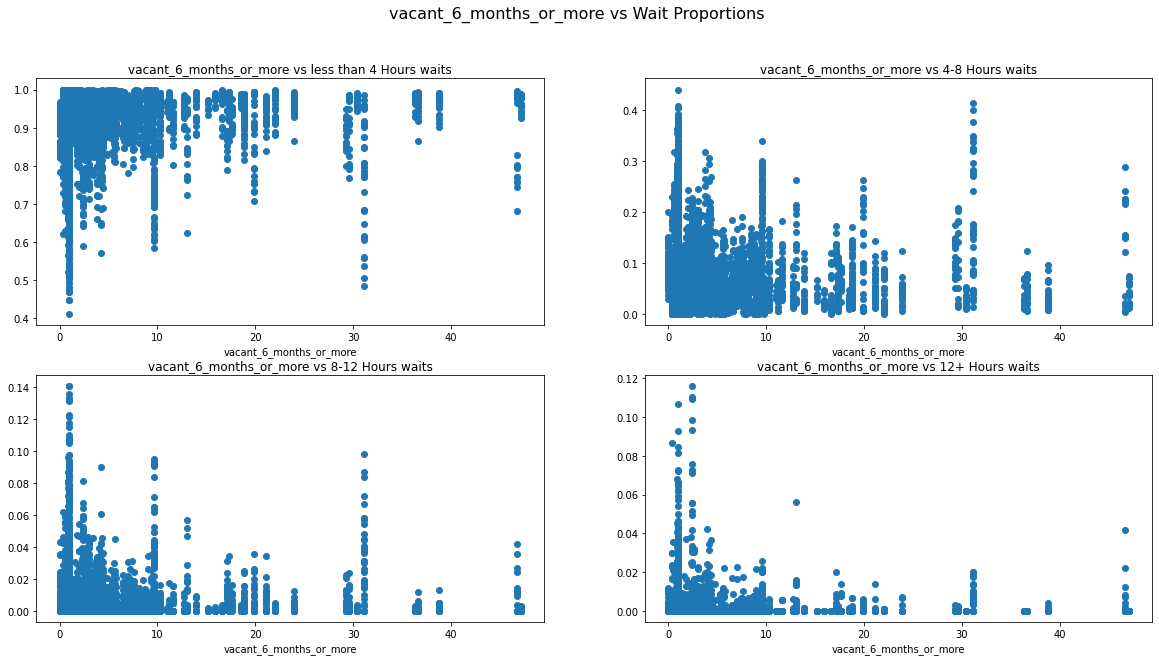

In [50]:
for feature in names:
    fig, axs = plt.subplots(2, 2)
    feature = feature.split(" ")[0]

    axs[0,0].scatter(X[feature], Y.proportion_under_4_hours)
    axs[0,0].set_title("{} vs less than 4 Hours waits".format(feature))

    axs[0,1].scatter(X[feature], Y.proportion_4_hours_8_hours)
    axs[0,1].set_title("{} vs 4-8 Hours waits".format(feature))

    axs[1,0].scatter(X[feature], Y.proportion_8_hours_12_hours)
    axs[1,0].set_title("{} vs 8-12 Hours waits".format(feature))

    axs[1,1].scatter(X[feature], Y.proportion_over_12_hours)
    axs[1,1].set_title("{} vs 12+ Hours waits".format(feature))

    for ax_r in axs:
        for ax in ax_r:
            ax.set_xlabel(feature)

    fig.set_size_inches(20, 10)
    fig.suptitle("{} vs Wait Proportions".format(feature), fontsize=16)
    fig.show()

In [51]:
# # import numpy as np
# for freq in range(2, 28+1):
#     fig, axs = plt.subplots(2, 2)
#     feature = "moon_phase"
#
#     axs[0,0].scatter(np.mod(X[feature], freq), Y.proportion_under_4_hours)
#     axs[0,0].set_title("{} mod {} vs less than 4 Hours waits".format(feature, freq))
#
#     axs[0,1].scatter(np.mod(X[feature], freq), Y.proportion_4_hours_8_hours)
#     axs[0,1].set_title("{} mod {} vs 4-8 Hours waits".format(feature, freq))
#
#     axs[1,0].scatter(np.mod(X[feature], freq), Y.proportion_8_hours_12_hours)
#     axs[1,0].set_title("{} mod {} vs 8-12 Hours waits".format(feature, freq))
#
#     axs[1,1].scatter(np.mod(X[feature], freq), Y.proportion_over_12_hours)
#     axs[1,1].set_title("{} mod {} vs 12+ Hours waits".format(feature, freq))
#
#     for ax_r in axs:
#         for ax in ax_r:
#             ax.set_xlabel(feature)
#
#     fig.set_size_inches(20, 10)
#     fig.suptitle("{} vs Wait Proportions".format(feature), fontsize=16)
#     fig.show()

In [52]:
# fig, axs = plt.subplots()
#
# axs.scatter(X.attendance_norm, X.moon_phase)
#
#
# fig.set_size_inches(20, 10)
# fig.suptitle("attendance_norm vs moon_phase", fontsize=16)

In [53]:
# import numpy as np
#
# feature = "moon_phase"
# for bins_n in range(10,100,10):
#     data = X[feature]
#     bins = np.linspace(0, max(data), bins_n)
#     digitized = np.digitize(data, bins)
#     bin_means = [Y.proportion_under_4_hours[digitized == i].mean() for i in range(len(bins))]
#     bin_max = [Y.proportion_under_4_hours[digitized == i].max() for i in range(len(bins))]
#     bin_min = [Y.proportion_under_4_hours[digitized == i].min() for i in range(len(bins))]
#     bin_median = [Y.proportion_under_4_hours[digitized == i].median() for i in range(len(bins))]
#     bins.shape, len(bin_means)
#     bins
#     digitized
#
#     fig, axs = plt.subplots(2, 2)
#     axs[0,0].scatter(bins, bin_means)
#     axs[0,0].set_title("{} bin_means".format(bins_n))
#
#     axs[0,1].scatter(bins, bin_min)
#     axs[0,1].set_title("{} bin_min".format(bins_n))
#
#     axs[1,0].scatter(bins, bin_max)
#     axs[1,0].set_title("{} bin_max".format(bins_n))
#
#     axs[1,1].scatter(bins, bin_median)
#     axs[1,1].set_title("{} bin_median".format(bins_n))
#
#     for ax_r in axs:
#         for ax in ax_r:
#             ax.set_xlabel(feature)
#
#     fig.set_size_inches(20, 10)
#     fig.suptitle("{} with {} bins vs Wait Proportions".format(feature, bins_n), fontsize=16)
#     fig.show()

In [54]:
# (28./90.) * 3

In [55]:
# import numpy as np
#
# feature = "moon_phase"
#
# for mod in np.linspace(0.5,2.0, 10):
#     fig, axs = plt.subplots()
#     axs.scatter(np.mod(X[feature] ,mod), Y.proportion_under_4_hours)
#     axs.set_title("{} mod".format(mod))
#
#     fig.set_size_inches(20, 10)
#     fig.suptitle("{} mod {} bins vs Wait Proportions".format(feature, mod), fontsize=16)
#     fig.show()

In [56]:
# bins_n = 100
# data = X[feature]
# bins = np.linspace(0, max(data), bins_n)
# digitized = np.digitize(data, bins)
# bin_means = [Y.proportion_under_4_hours[digitized == i].mean() for i in range(len(bins))]
# bin_max = [Y.proportion_under_4_hours[digitized == i].max() for i in range(len(bins))]
# bin_min = [Y.proportion_under_4_hours[digitized == i].min() for i in range(len(bins))]
# bin_median = [Y.proportion_under_4_hours[digitized == i].median() for i in range(len(bins))]
# bins.shape, len(bin_means)
# bin_max